<a href="https://colab.research.google.com/github/Demosthene-OR/Student-AI-and-Data-Management/blob/main/sklearn_classif_03_knn_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://prof.totalenergies.com/wp-content/uploads/2024/09/TotalEnergies_TPA_picto_DegradeRouge_RVB-1024x1024.png" height="150" width="150">
<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" >Scikit-Learn: Classification Models</h1>
<h2 style = "text-align:center">k-nearest neighbors method</h2>
<hr style="border-width:2px;border-color:#75DFC1">


>In this exercise, we will study an example of using the *K Nearest Neighbors* (KNN) method in Python. The packages used will be **pandas**, **scikit-learn** and its sub-packages, in particular:
**neighbors** and **model_selection**.

<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">Introduction to dataset</h3>
<hr style="border-width:2px;border-color:#75DFC1">

>The data used in this exercise come from a collection of handwritten figures by a group of 43 people, available [here](https://archive.ucs.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits), and importable directly in the 'Datasets' package' of *Scikit-Learn *.<br>
> These are black and white images, normalized, centered and 8x8 pixel size. The images are given here in the form of unidimensional vectors of size 64 (pixels) in the attribute **`data`**, and in the form of tables of size 8x8 in the attribute **`images`**. The attribute **`target`** contains the labels corresponding to each image (a figure between 0 and 9).

<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">1. Data preparation and modeling</h3>
<hr style="border-width:2px;border-color:#75DFC1">

* **(a)** Load the package *__neigbors__* from the library *__sklearn__*.


* **(b)** Load the package *__datasets__* from the library *__sklearn__*.


* **(c)** Load the package *__train_test_split__* from the library *__sklearn.model_selection__*.


* **(d)** Load the library *__pandas__* under the name *__pd__*, and *__numpy__* under the name *__np__*.


* **(e)** import the data dictionary into **digits** thanks to the function `datasets.load_digits ()`.


* **(f)** Save in a dataframe **X_digits** The data contained in the attribute **`data`** of **digits**.


* **(g)** Save in **y_digits** The labels contained in the attribute **`target`** of **digits**.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
Remember that before looking at the solution, you can always access the official Python help by typing <code style = "background-color: transparent ; color : inherit"><b>help(name_function)</b></code> in the console.
</div>



In [1]:
# Import of the necessary libraries
from sklearn import neighbors
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


digits = datasets.load_digits()

X_digits = pd.DataFrame(digits.data)
y_digits = digits.target



* **(h)** Run the following cell to randomly display six pixelated digits present in the data.



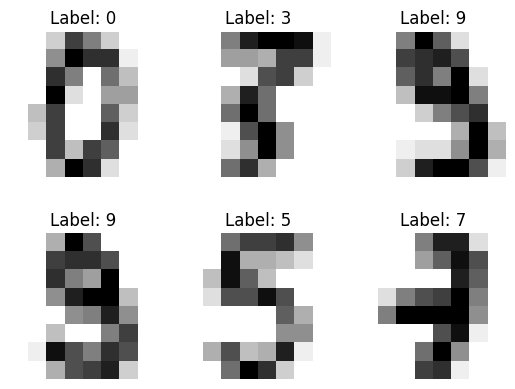

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm # pour importer de nouvelles cartes de couleur

j=0

for i in np.random.choice(np.arange(0, len(y_digits)), size=6):
    j=j+1
#On stores the index in list I to be able to display the corresponding label later.

    plt.subplot(2,3,j)
# Add *Plt.subplot (2,3, J)* each iteration allows you to display all the images
# sets on the same figure.

    plt.axis('off')
# Allows you to delete the axes (here is used to see the titles better)

    plt.imshow(digits.images[i],cmap = cm.binary, interpolation='None')
# Display image n ° I
# The use of CM.Binary allows you to see the figures in gray on a white background.

    plt.title('Label: %i' %y_digits[i])
# For each image we write in title the label that suits him.



* **(i)** Diviser les matrices **`X_digits`** et **`y_digits`** en un ensemble d'apprentissage de 80% (**`X_train`**, **`y_train`**) et un ensemble de test (**`X_test`**, **`y_test`**) de 20%.<br>
Add the argument `random_state = 126` in the function **`train_test_split`** for the reproducibility of the choice of random.



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=126)



<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">2. Data Learning</h3>
<hr style="border-width:2px;border-color:#75DFC1">

> The K-Plus nearby K-Plus method (KNN) is an extremely simple supervised learning method in its most basic form, and yet often efficient for complex classification tasks.
The KNN algorithm does not train on any data, but uses all the data available each time to classify new data.
>
> The principle is as follows: unknown class data is compared to all stored data. The class to which the new data is attributed is the majority class among its **K closer neighbors** in the sense of a chosen distance. By default, the distance used by the class **`KNeighborsClassifier'** is the Euclidean distance.
>
> The figure below illustrates the operation of an algorithm **3-Nn**. For a new entry which we want to predict the class. The algorithm calculates the 3 neighbors closest to this entry and deduces the class which constitutes the majority of these neighbors in order to deduce the class of the new point.
>
><img src="https://datascientest.fr/train/assets/knn_newpoint.gif" style="width:500px" />
>
> The function [**`KNeighborsClassifier`**](https://scikit-learn.org/stable/Modules/GeNeRared/Sklearn.neighbors.kneighborsclassify.html) of the Package **`neighbors`** allows you to create a Knn classifier, Mainly the number of 'neighbors' **`n_neighbors`** chosen, and in **` Metric`** the distance to be used among those [included in the Package](https://scikit-learn.org/stable/modles/generated/sklearn.metrics.dististemetric.html?highlight=distance%20metric#Sklearn.metrics.distancemetric).

* **(a)** Run the following cell to view the influence of hyperparammeters on a **K model closer neighbors**.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
The datasets contain two classes (red dots/blue dots) with <b>x1</b> and <b>x2</b> as features. The background color represents the probability of belonging to one of the classes. The redder the color, the higher the probability of belonging to class 2.
</div>



In [4]:
%matplotlib inline
!wget https://raw.githubusercontent.com/Demosthene-OR/Student-AI-and-Data-Management/main/interactions.py

from interactions import show_knn
show_knn()


--2025-09-14 23:58:40--  https://raw.githubusercontent.com/Demosthene-OR/Student-AI-and-Data-Management/main/interactions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20555 (20K) [text/plain]
Saving to: ‘interactions.py’

interactions.py     100%[===================>]  20.07K  --.-KB/s    in 0.001s  

2025-09-14 23:58:41 (23.5 MB/s) - ‘interactions.py’ saved [20555/20555]




* **(b)** Create a classifier **`knn`**, with k = 7 and the distance 'Minkowski' (Distance by default, with P = 2, Euclidean distance).


* **(c)** Adjust the classifier to the training set (**`X_train`** and **`y_train`**).

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
Note that no model "training" is done strictly speaking. The algorithm will simply use the labeled data provided to it to predict new figures.
</div>



In [5]:
# Creation of the classifier and construction of the model on training data
knn = neighbors.KNeighborsClassifier(n_neighbors=7, metric='minkowski')
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)


<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">3. Evaluation of the classification model</h3>
<hr style="border-width:2px;border-color:#75DFC1">

><div class="alert alert-success">
<i class="fa fa-question-circle"></i> &emsp;
Assessment is the key to success in data science.  It aims to verify the model (s) or the knowledge obtained in order to ensure that they meet the objectives formulated at the start of the process. It also contributes to the decision to deploy the model or its improvement. At this stage, we notably test the robustness and precision of the models obtained.
</div>

* **(a)** Apply the model to the data set data and store the predictions obtained in the variable **`y_pred`**.


* **(b)** Show a confusion matrix to compare the real and predicted classes.



In [6]:
y_pred = knn.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Actual Class'], colnames=['Predicted Class'])


Predicted Class,0,1,2,3,4,5,6,7,8,9
Actual Class,,,,,,,,,,
0,32,0,0,0,0,0,0,0,0,0
1,0,54,0,0,0,0,0,0,0,0
2,0,0,38,0,0,0,0,0,0,0
3,0,0,0,28,0,0,0,0,0,0
4,0,0,0,0,41,0,0,0,0,0
5,0,0,0,0,0,40,1,0,0,2
6,0,0,0,0,0,0,35,0,0,0
7,0,0,0,0,0,0,0,27,0,0
8,0,0,0,0,0,0,0,0,34,0



>The model created seems to be fairly efficient on the test set.<br>
> On 360 written written figures, only three figures 5 and four digits 9 were poorly classified.
>
> The model can however be improved, by choosing a different distance, or another number of 'neighbors'.

* **(c)** Create a new classifier **`knn_m`**, with K = 5 and the distance 'Manhattan'.


* **(d)** Adjust the new classifier to the training set (**`X_train`** and **`y_train`**).



In [7]:
#Creation of the new classifier and model training
knn_m = neighbors.KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_m.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan')


* **(e)** Calculate the performance score ('accuracy') for both models.



In [8]:
#Score of the model using the distance from Minkowski
score_minkowski = knn.score(X_test, y_test)

#Model of the model using the distance from Manhattan
score_manhattan = knn_m.score(X_test, y_test)

score_minkowski, score_manhattan


(0.9805555555555555, 0.9833333333333333)


>Even if it may seem surprising, the two distances get significantly the same score.<br>
>Does this mean that these two distances are so suitable for our data? Is the choice of **k** important?<br>
> The best way to answer these questions is to provide a graphic analysis of the performance of the metric models, depending on the choice of **k**.

* **(f)** Create three lists **score_minko**, **score_man**, **score_cheb**, in which you will store the scores of 3 models using respectively the matrices of Minkowski, Manhattan and Chebyshev, for values ​​of **k going from 1 to 40**.



In [9]:
score_minko = []
score_man = []
score_cheb = []

for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score_minko.append(knn.score(X_test, y_test))

for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    score_man.append(knn.score(X_test, y_test))

for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    score_cheb.append(knn.score(X_test, y_test))



* **(g)** Show in a graph the lists created according to the value of k.


* **(h)** Use different colors and legends to differentiate metrics.



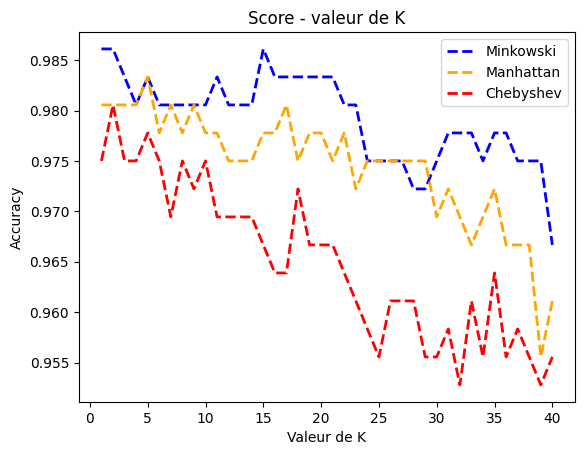

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.clf()  # vide la figure
plt.plot(range(1, 41), score_minko, color='blue', linestyle='dashed', lw=2, label='Minkowski')
plt.plot(range(1, 41), score_man, color='orange', linestyle='dashed', lw=2, label='Manhattan')
plt.plot(range(1, 41), score_cheb, color='red', linestyle='dashed', lw=2, label='Chebyshev')
plt.title('Score - valeur de K')
plt.xlabel('Valeur de K')
plt.ylabel('Accuracy')
plt.legend();
plt.show()



>The distances of Minkowski and Manhattan give better performance when **k** is small (<10). The Minkowski distance appears more stable, and its rate of correct predictions only decreases from k=20.<br>
>The best absolute score is obtained with the distance from Minkowski for a k = 2; 3 or 15.<br>
>
> Be careful however, the test sample is relatively small and the data sampling gives an important place to the random, these results can therefore vary if we select the test set otherwise. It seems more judicious to choose K = 3 which in addition to obtaining the best score for the distance from Minkowski, presents good performance on other standards.

<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">Synthesis</h3>
<hr style="border-width:2px;border-color:#75DFC1">

>The k-NN algorithm is simple but powerful. The advantage is that he does not require any model training to make predictions, when it is generally the most complicated part of a machine learning algorithm.<br>
> It is used in many areas, in particular: recognition of forms, compression algorithms, targeted marketing.
>
>On the other hand, it is a very greedy classifier in memory, sensitive to unrelevant and correlated attributes.<br>
For a large dataset, the prediction will be slow because the algorithm travels, for each individual to classify, all the data of the learning sample.

